start...
f:           4           3          2
-0.5321 x + 0.07264 x + 0.5257 x + 0.0005902 x + 0.8415


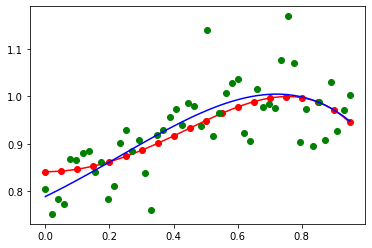

total absolute error: 20.641920945151053
w:  [ 0.78920269  0.32854169  0.22729149 -0.22556724 -0.20240731]


In [24]:
"""
1.&2.&3.&4.&5.&6. Generate data, MAP fitting and computing absolute error value
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

def actual_distribution():        # generate points using given function
    x = np.arange(0, 1.0, 0.05);  
    y = np.sin(np.power(x, 2) + 1)
    return x, y

def add_noise(y_curve):      # add Guassian random noise;mu = 0, sigma=0.06
    mu = 0
    sigma = 0.06
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def numpy_poly_fitting(x, y, M):  # polynomial functions
    z = np.polyfit(x, y, M)
    f = np.poly1d(z)
    return f

def my_MAP_fitting(x, y, M, a):    # MAP algorithm; hyperparameter alpha(a) 
    N = len(x)
    mx = np.zeros([N, M+1])
    vy = np.zeros([N, 1])
    sigma2 = 0.0036
    
    for n in range(N):
        for m in range(M+1):
            mx[n][m] = np.power(x[n], m)
        vy[n][0] = y[n]
        
    hyperm = np.identity(M+1)
    mxx = np.dot(mx.T, mx) + (a*sigma2)*hyperm
    imxx = linalg.pinv(mxx)
    tmp = np.dot(imxx, mx.T)
    w = np.dot(tmp, vy)
    w = np.squeeze(w)
    return w, mx

def my_MAP_plot(x, w):        # plot the curve of MAP prediction
    M = len(w) - 1
    N = len(x)
    
    mx = np.zeros([N, M+1])
    
    for n in range(N):
        for m in range(M+1):
            mx[n][m] = np.power(x[n], m)
            
    y = np.dot(mx, w)
    return x, y

def total_absolute_Error(w, x, y, a):    # error computing E(w)
    N = len(x)
    M = len(w)-1
    beta = 1/0.0036     # beta = 1/(sigma)^2
    Ew1 = (N/2.0)* (np.log(2*math.pi) - np.log(beta))
    tmp = np.power((np.dot(w.T, x)-y),2)
    Ew2 = (beta/2) * np.sum(tmp, axis=0)
    Ew3 = (M/2.0) * (np.log(2*math.pi) - np.log(a))
    Ew4 = (a/2.0) * np.dot(w.T, w)
    Ew = Ew1 + Ew2 + Ew3 + Ew4
    return Ew

#= = = = = = = = = = = = = =

print('start...')
# generate true data
x_true, y_true = actual_distribution()

#fit on the actual data
f = numpy_poly_fitting(x_true, y_true, M=4)  # M=4
print('f: ', f)
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = f(x_curve)

# add noise on the true data
y_noise = add_noise(y_curve)
x_noise = x_curve

#estimate the curve from noisy data
w, mx = my_MAP_fitting(x_noise, y_noise, M=4, a=0.5)  #set M=4, a=0.5
[x_est, y_est] = my_MAP_plot(x_curve, w)

# compute absolute error value
Ew = total_absolute_Error(w, mx.T, y_noise, a=0.5)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()

# print
print('total absolute error:', Ew)  #display total absolute value
print('w: ', w)  #display values of w

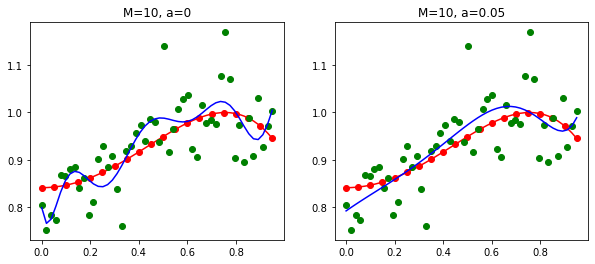

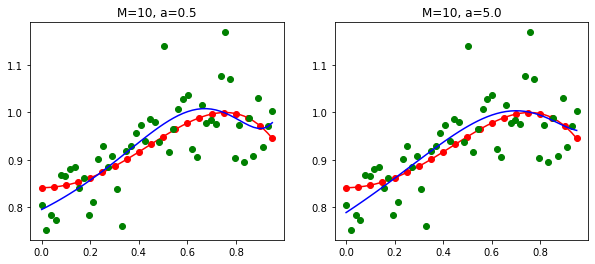

In [25]:
"""
7.changing M and alpha(a)
"""
#estimate the curve from noisy data
w, mx = my_MAP_fitting(x_noise, y_noise, M=10, a=0)  #set M=10(overfitting), a=0.005
[x_est, y_est] = my_MAP_plot(x_curve, w)
w1, mx1 = my_MAP_fitting(x_noise, y_noise, M=10, a=0.05)  #set M=10, a=0.05
[x_est1, y_est1] = my_MAP_plot(x_curve, w1)
w2, mx2 = my_MAP_fitting(x_noise, y_noise, M=10, a=0.5)  #set M=10, a=0.5
[x_est2, y_est2] = my_MAP_plot(x_curve, w2)
w3, mx3 = my_MAP_fitting(x_noise, y_noise, M=10, a=5.0)  #set M=10, a=5.0
[x_est3, y_est3] = my_MAP_plot(x_curve, w3)

#show the plot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est, y_est, 'blue')
ax1.title.set_text("M=10, a=0")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est1, y_est1, 'blue')
ax2.title.set_text("M=10, a=0.05")

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est2, y_est2, 'blue')
ax1.title.set_text("M=10, a=0.5")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est3, y_est3, 'blue')
ax2.title.set_text("M=10, a=5.0")
plt.show()

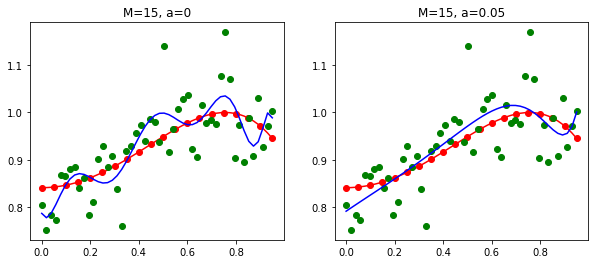

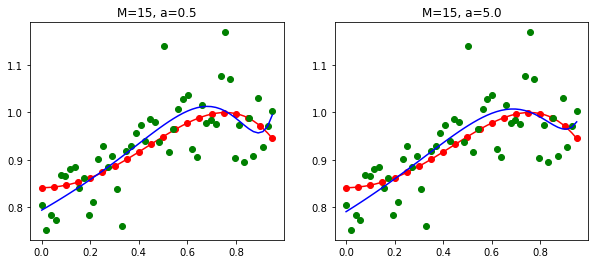

In [26]:
#estimate the curve from noisy data
w, mx = my_MAP_fitting(x_noise, y_noise, M=15, a=0)  #set M=15(overfitting), a=0
[x_est, y_est] = my_MAP_plot(x_curve, w)
w1, mx1 = my_MAP_fitting(x_noise, y_noise, M=15, a=0.05)  #set M=15, a=0.05
[x_est1, y_est1] = my_MAP_plot(x_curve, w1)
w2, mx2 = my_MAP_fitting(x_noise, y_noise, M=15, a=0.5)  #set M=15, a=0.5
[x_est2, y_est2] = my_MAP_plot(x_curve, w2)
w3, mx3 = my_MAP_fitting(x_noise, y_noise, M=15, a=5)  #set M=15, a=5
[x_est3, y_est3] = my_MAP_plot(x_curve, w3)

# show the plot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est, y_est, 'blue')
ax1.title.set_text("M=15, a=0")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est1, y_est1, 'blue')
ax2.title.set_text("M=15, a=0.05")

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est2, y_est2, 'blue')
ax1.title.set_text("M=15, a=0.5")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est3, y_est3, 'blue')
ax2.title.set_text("M=15, a=5.0")
plt.show()

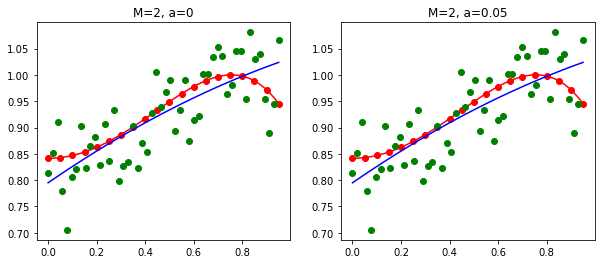

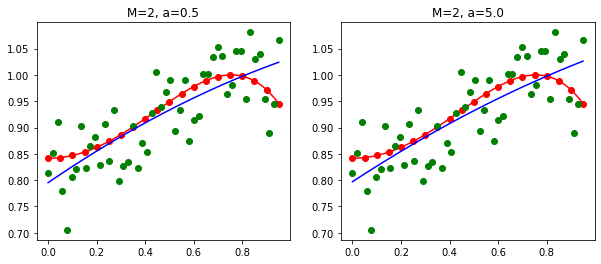

In [18]:
#estimate the curve from noisy data
w, mx = my_MAP_fitting(x_noise, y_noise, M=2, a=0)  #set M=2(underfitting), a=0
[x_est, y_est] = my_MAP_plot(x_curve, w)
w1, mx1 = my_MAP_fitting(x_noise, y_noise, M=2, a=0.05)  #set M=2, a=0.05
[x_est1, y_est1] = my_MAP_plot(x_curve, w1)
w2, mx2 = my_MAP_fitting(x_noise, y_noise, M=2, a=0.5)  #set M=2, a=0.5
[x_est2, y_est2] = my_MAP_plot(x_curve, w2)
w3, mx3 = my_MAP_fitting(x_noise, y_noise, M=2, a=5)  #set M=2, a=5
[x_est3, y_est3] = my_MAP_plot(x_curve, w3)

# show the plot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est, y_est, 'blue')
ax1.title.set_text("M=2, a=0")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est1, y_est1, 'blue')
ax2.title.set_text("M=2, a=0.05")

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(x_true, y_true, 'ro')
ax1.plot(x_curve, y_curve, 'red')
ax1.plot(x_noise, y_noise, 'go')
ax1.plot(x_est2, y_est2, 'blue')
ax1.title.set_text("M=2, a=0.5")

ax2.plot(x_true, y_true, 'ro')
ax2.plot(x_curve, y_curve, 'red')
ax2.plot(x_noise, y_noise, 'go')
ax2.plot(x_est3, y_est3, 'blue')
ax2.title.set_text("M=2, a=5.0")
plt.show()

In [ ]:
"""
8.From experiment in #7, by looking at the pictures when M=10 or 15,
a=0,we can see that when M is too large, that would cause an over-
fitting problem and the fitting accuracy would be largely reduced.
Looking at figures when a=0.05,0.5 and 5 for M=10 or 15 respectively, 
we can know that by increasing hyperparameter alpha, the overfitting
problem can be reduced to increase the fitting accuracy.So that means
hyperparameter alpha plays a role in mitigating the overfitting problem.

However,looking at results when M=2, which is a underfitting problem, 
we can see that the fitting accuracy cannot be increased by changing
alpha,which indicates this hyperparameter cannot deal with underfitting.
"""